## Preparation

#### Import Libraries

In [1]:
import torch
import numpy as np
import pandas as pd
from model_GNN import solvgnn_binary, solvgnn_ternary
from generate_dataset import solvent_dataset_binary, solvent_dataset_ternary
import matplotlib.pyplot as plt

Using backend: pytorch


#### Update figure parameters

In [2]:
plt.rcParams.update({
    'text.usetex': True,
    'font.family':'serif',
    'axes.labelsize':10,
    'xtick.labelsize':9,
    'ytick.labelsize':9})

### P-x-y Example for Binary Mixtures 

#### Load trained models

In [3]:
model = solvgnn_binary(in_dim=74, hidden_dim=256, n_classes=2).cuda()

In [4]:
cv_param_list = []
for cv_id in range(5):
    cv_param_list.append('../saved_model/solvgnn_binary_final_model_cv{}.pth'.format(cv_id))

#### Initialize dataset class

In [5]:
dataset = solvent_dataset_binary(input_file_path=None)

#### Enter input information

In [6]:
solv1_x_range = np.arange(0,1.05,0.05)
chemical_list = ["water","methanol"]
smiles_list = ["O","CO"]

#### Generate phase diagrams

solv1: water, solv2: methanol
temperature: 298.0 K
number of data points: 21
---start GNN prediction---
---finished in 4.52 seconds---


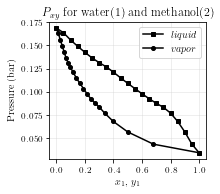

---overall finished in 5.33 seconds---


In [7]:
plot_data = dataset.plot_VLE(model,
                             chemical_list,
                             smiles_list,
                             solv1_x_range,
                             temperature=298.,
                             cp_list=cv_param_list,
                             uncertainty=True,
                             overlay_with_aspen=False,
                             save_figure=False,
                             save_data=False,
                             aspen_chemical_list=None,
                             convert_cosmo=False,
                             plot_data_cosmo=None,
                             overlay_with_cosmo=False,
                             overlay_with_aspen_and_cosmo=False)

In [8]:
plot_data.head()

,solv1_gam,solv1_gam_std,solv2_gam,solv2_gam_std,x1,y1,pressure
0,0.956174,0.223456,0.003854,0.027035,0.00,0.000000,0.168717
1,0.273201,0.178206,0.012120,0.029926,0.05,0.012600,0.163674
2,0.352028,0.126270,0.000569,0.014205,0.10,0.028643,0.155810
3,0.302890,0.136089,-0.001627,0.015204,0.15,0.042774,0.148999
4,0.231057,0.122786,0.001626,0.015637,0.20,0.055467,0.142582


Activity coefficient predictions $\gamma_i$ that are close to the bounds, $\gamma_1(x_1=0)$ and $\gamma_2(x_2=0)$, usually show high errors. However, since activity coefficients are multiplied by the composition, the effects of these error are extremely low (close to 0). The errors at the extreme conditions are mainly due to the lack of training/validation data for these extreme values. See a detailed discussion in our paper.

#### Alternatively, you can obtain only the activity coefficient predictions

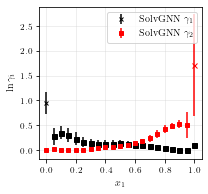

In [9]:
plot_data = dataset.get_VLE(model,
                            chemical_list,
                            smiles_list,
                            solv1_x_range,
                            temperature=298.,
                            cp_list=cv_param_list,
                            uncertainty=True)
dataset.plot_gamma(chemical_list,
                  plot_data,
                  save_figure=False,
                  overlay_with_aspen=False,
                  overlay_with_cosmo=False,
                  overlay_with_aspen_and_cosmo=False)

### P-x-y Example for Ternary Mixtures

#### Load trained models

In [10]:
model = solvgnn_ternary(in_dim=74, hidden_dim=256, n_classes=3).cuda()

In [11]:
cv_param_list = []
for cv_id in range(5):
    cv_param_list.append('../saved_model/solvgnn_ternary_final_model_cv{}.pth'.format(cv_id))

#### Initialize dataset class

In [12]:
dataset = solvent_dataset_ternary(input_file_path=None)

#### Enter input information

In [13]:
solv1_x_range = np.arange(0,1.05,0.05)
chemical_list = ["water","acetone","methyl isobutyl ketone"]
smiles_list = ["O","CC(=O)C","CC(C)CC(=O)C"]

#### Generate phase diagrams

solv1: water, solv2: acetone, solv3: methyl isobutyl ketone
temperature: 298.0 K
---start GNN prediction---
number of data points: 231
---finished in 48.00 seconds---
---start plotting Pxy---


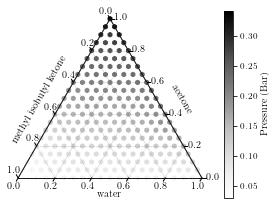

---overall finished in 48.21 seconds---


In [14]:
plot_data = dataset.plot_VLE(model,
                             chemical_list,
                             smiles_list,
                             solv1_x_range=solv1_x_range,
                             solv2_x_range=solv1_x_range,
                             temperature=298.,
                             cp_list=cv_param_list,
                             uncertainty=True,
                             overlay_with_Aspen=False,
                             save_figure=False,
                             save_data=False)

To find the isobaric lines, use the following code:

---start plotting Pxy---


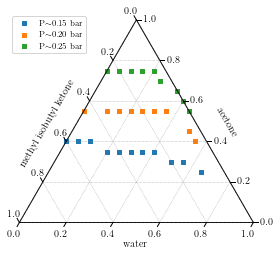

(<Figure size 288x288 with 1 Axes>, TernaryAxesSubplot: -9223371911054606236)

In [15]:
dataset.replot_VLE(chemical_list,
                   plot_data,
                   save_figure=False,
                   selected_pressure_list=[0.15,0.2,0.25],
                   selected_pressure_buffer=0.03,
                   convert_cosmo=False,
                   marker_size=20,
                   specific_range=False,
                   background_pressure=False,
                   overlay_with_cosmo=False,
                   plot_data_cosmo=None)

In [16]:
plot_data.head()

,solv1_gam,solv1_gam_std,solv2_gam,solv2_gam_std,solv3_gam,solv3_gam_std,x1,x2,x3,y1,y2,y3,pressure
0,1.393540,0.854732,1.250562,0.592257,0.159843,0.021028,0.0,0.00,1.00,0.0,0.000000,1.000000,0.030525
1,1.597777,0.968529,0.477689,0.136388,0.054907,0.041778,0.0,0.05,0.95,0.0,0.484208,0.515792,0.050621
2,1.695961,0.923876,0.223359,0.118440,0.053774,0.045592,0.0,0.10,0.90,0.0,0.606071,0.393929,0.062721
3,1.692513,0.914772,0.184719,0.122674,0.042277,0.047290,0.0,0.15,0.85,0.0,0.703977,0.296023,0.077927
4,1.687642,0.895426,0.166537,0.112732,0.041417,0.047512,0.0,0.20,0.80,0.0,0.768043,0.231957,0.093519


Activity coefficient predictions $\gamma_i$ that are close to the bounds, $\gamma_1(x_1=0)$, $\gamma_2(x_2=0)$, and $\gamma_3(x_3=0)$, usually show high errors. However, since activity coefficients are multiplied by the composition, the effects of these error are extremely low (close to 0). The errors at the extreme conditions are mainly due to the lack of training/validation data for these extreme values. See a detailed discussion in our paper.

#### Similar to the binary case above, you can obtain only the activity coefficient predictions

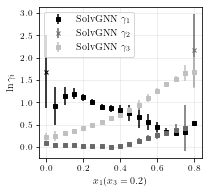

In [19]:
subset = plot_data[plot_data["x3"]==0.2]

fig,ax = plt.subplots(figsize=(3,2.8))
ax.grid(color='lightgray',linewidth=0.75,alpha=0.5)
ax.errorbar(subset["x1"].iloc[0],subset["solv1_gam"].iloc[0],yerr=subset["solv1_gam_std"].iloc[0],color="black",fmt="x",markersize=4)
ax.errorbar(subset["x1"].iloc[1:],subset["solv1_gam"].iloc[1:],yerr=subset["solv1_gam_std"].iloc[1:],color="black",fmt="s",markersize=4,label="SolvGNN $\gamma_1$")
ax.errorbar(subset["x1"].iloc[:-1],subset["solv2_gam"].iloc[:-1],yerr=subset["solv2_gam_std"].iloc[:-1],color="dimgray",fmt="s",markersize=4)
ax.errorbar(subset["x1"].iloc[-1],subset["solv2_gam"].iloc[-1],yerr=subset["solv2_gam_std"].iloc[-1],color="dimgray",fmt="x",markersize=4,label="SolvGNN $\gamma_2$")
ax.errorbar(subset["x1"],subset["solv3_gam"],yerr=subset["solv3_gam_std"],color="silver",fmt="s",markersize=4,label="SolvGNN $\gamma_3$")
ax.set_xlabel("$x_1$($x_3=0.2$)")
ax.set_ylabel("$\ln\gamma_i$")
plt.legend()
plt.tight_layout()